In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from IPython import display
mpl.style.use("ggplot")

---
#Unsupervised Learning
---

---
##Unsupervised learning - there are no labels

##As before there are m training examples, but this time only containing $x$ (no $y$)

##Have algorithms that find structure, for example, groups or clusters of points

##One clustering algorithm is K-means
###The most popular clustering algorithm
###It is an iterative algorithm
---

---
#K-means
##Step 1: Choose the number of clusters
##Step 2: Assign cluster centroids to randomly chosen data points
##Step 3: Assign all the data points to their nearest cluster centroids
##Step 4: Based on the assigned data move the cluster centroids
##Step 5: Repeat from Step 3 until the centroids do not move, and the data assigned to each centroid remains the same or the cost function stops decreasing
---

---
##Some useful helper functions
---

In [2]:
#create some artificial data
def assign_points(mm, K, m, N):
    '''Create K clusters of mm points of N dimension'''
    if m != mm*K:
        print "mm x K must equal m"
        return None
    
    x = np.zeros((m, N))
    #k clusters
    for k in xrange(K):
        #create groups of mm points - 0 to mm, mm - 2mm, 2mm - 3mm
        for i in xrange(k*mm, (k+1)*mm):
            #get random points in N dimensions
            for n in xrange(N):
                x[i][n] = np.random.normal(loc = k * 3.0, scale = 0.5)
    return x

def draw_plot(x, centroids, K, ax):
    '''Given a set of axes, ax, plot the centroids on the axes in red. Plot the data too'''
    
    ax.set_title("Plot of Feature x and K-means Centroids")
    ax.set_xlabel("x - dimension 1")
    ax.set_ylabel("x - dimension 2")
    ax.scatter(x[:,0], x[:,1])
    for k in xrange(K):
        ax.scatter(centroids[k][0], centroids[k][1], marker = 'o', color = 'r')
        
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def dist(x, y, N):
    '''Calculates euclidean distance between 2 points in N dimensions'''
    
    sum = 0.0
    for i in xrange(N):
        sum += (x[i] - y[i]) * (x[i] - y[i])
    return np.sqrt(sum)

def J(centroid, c, x, m, K):
    '''Calculate the cost function J. This is the sum of all of the distances between all of the points and
    their associated centroid'''
    
    the_sum = 0.0
    for i in xrange(m):
        for k in xrange(K):
            if c[i] == k:
                the_sum += dist(centroid[k], x[i], N)
    return the_sum

---
##An interactive version of K-means
---

In [3]:
def interactive_K_means(K, x, m, N=2):
    '''An interactive version of the algorithm to show how it moves the centroids around the data'''
    
    #set up a main canvas for a plt
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    
    #establish the centroid array - K centroids, each of N dimensions
    centroid = np.zeros((K,N))
    
    #Assign each centroid to a randomly chosen data point
    for k in xrange(K):
        #r is a random integer between 0 and m, there are m data points
        r = np.random.randint(low = 0, high = m)
        
        #now assign each dimension of each centroid
        for n in xrange(N):
            centroid[k][n] = x[r][n]
     
    
    #c will be an array that holds the centroid that is nearest to each data point
    c = np.zeros(m)
    
    #count_k will hold the number of data points 'associated' with each centroid
    count_k = np.zeros(K)
    old_J = 1e99
    
    while True:
        #clear out the old plot
        plt.cla()
        #draw a new plot
        draw_plot(x, centroid, K, ax)  
        
        #set c to 0 at the start of each iteration
        c[:] = 0
        
        #go through all the data points, and for each one measure the distance to all the centroids
        #use the euclidean distance
        #record the closest centroid in the c array
        for i in xrange(m):
            min = 1e99
            for k in xrange(K):
                the_dist = dist(centroid[k], x[i], N)
                if the_dist < min:
                    min = the_dist
                    c[i] = k
             
        #go through each centroid and intialize their positions to 0,0; and the number of points they are 
        #associated with to zero
        for k in xrange(K):
            count_k[k] = 0
            for n in xrange(N):
                centroid[k][n] = 0.0;
                
        #ASSIGN THE DATA TO THE CENTROIDS        
        
        #for each centroid, traverse the the dataset. If the point is associated with that centroid,
        #as recorded in the c array, then add 1 to the count of points associated with that centroid
        #sum the coordinates for each dimension
        for k in xrange(K):
            for i in xrange(m):
                if c[i] == k:
                    count_k[k] += 1
                    for n in xrange(N):
                        centroid[k][n] += x[i][n]
                
        #MOVE THE CENTROIDS BASED ON THE DATA ASSIGNED TO THE CLUSTER
        
        #Find the centroid's location by taking the mean of their summed dimensions
        #Handle the case where a centroid has 0 data points associated with it, by randomly assigning a
        #data point to it
        for k in xrange(K):              
            for n in xrange(N):
                if count_k[k] > 0:
                    centroid[k][n] /= count_k[k]
                if count_k[k] == 0:
                    #print "centroid %d has count zero" % k
                    r = np.random.randint(low = 0, high = m)
                    for n in xrange(N):
                        centroid[k][n] = x[r][n]
        
        #compute the current cost of the configuration
        new_J = J(centroid, c, x, m, K)
        
        print "Cost = {:5.2f}".format(new_J)
        #If the cost is not reducing then finish
        if np.fabs(new_J-old_J) < 1e-16:
            break
        old_J = new_J
    
        raw_input('>>>')
    return (centroid, new_J)

---
##Play around with the value of K using the interactive version of K-means
##Can you appreciate the local minima problem?
---

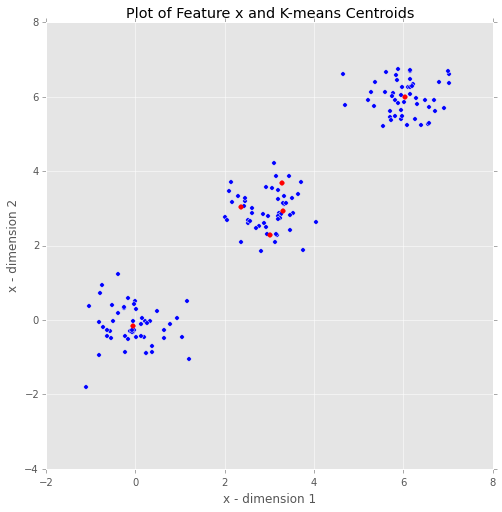

Cost = 80.87
Final cost = 80.87


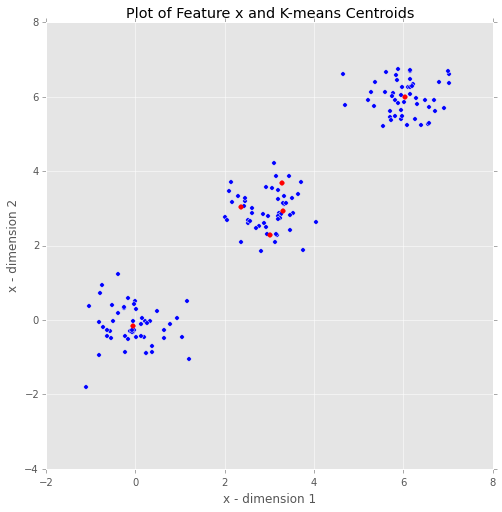

In [8]:
mm = 50
set_clusters = 3
m = mm * set_clusters
N = 2

#RUN THIS WITH DIFFERENT VALUES OF K
K = 6

#Run the interactive K-means from here
x = assign_points(mm, set_clusters, m, N)
centroids, j = interactive_K_means(K, x, m, N)
print "Final cost = {:5.2f}".format(j)

---
##A straightforward implmentation of K-means
---

In [5]:
def K_means(K, x, m, N=2):
    '''An implementation of the K-means algorithm'''
    
    #establish the centroid array - K centroids, each of N dimensions
    centroid = np.zeros((K,N))
    
    #Assign each centroid to a randomly chosen data point
    for k in xrange(K):
        #r is a random integer between 0 and m, there are m data points
        r = np.random.randint(low = 0, high = m)
        
        #now assign each dimension of each centroid
        for n in xrange(N):
            centroid[k][n] = x[r][n]
     
    
    #c will be an array that holds the centroid that is nearest to each data point
    c = np.zeros(m)
    
    #count_k will hold the number of data points 'associated' with each centroid
    count_k = np.zeros(K)
    old_J = 1e99
    
    while True:
        #set c to 0 at the start of each iteration
        c[:] = 0
        
        #go through all the data points, and for each one measure the distance to all the centroids
        #use the euclidean distance
        #record the closest centroid in the c array
        for i in xrange(m):
            min = 1e99
            for k in xrange(K):
                the_dist = dist(centroid[k], x[i], N)
                if the_dist < min:
                    min = the_dist
                    c[i] = k
             
        #go through each centroid and intialize their positions to 0,0; and the number of points they are 
        #associated with to zero
        for k in xrange(K):
            count_k[k] = 0
            for n in xrange(N):
                centroid[k][n] = 0.0;
                
        #ASSIGN THE DATA TO THE CENTROIDS        
        
        #for each centroid, traverse the the dataset. If the point is associated with that centroid,
        #as recorded in the c array, then add 1 to the count of points associated with that centroid
        #sum the coordinates for each dimension
        for k in xrange(K):
            for i in xrange(m):
                if c[i] == k:
                    count_k[k] += 1
                    for n in xrange(N):
                        centroid[k][n] += x[i][n]
                
        #MOVE THE CENTROIDS BASED ON THE DATA ASSIGNED TO THE CLUSTER
        
        #Find the centroid's location by taking the mean of their summed dimensions
        #Handle the case where a centroid has 0 data points associated with it, by randomly assigning a
        #data point to it
        for k in xrange(K):              
            for n in xrange(N):
                if count_k[k] > 0:
                    centroid[k][n] /= count_k[k]
                if count_k[k] == 0:
                    #print "centroid %d has count zero" % k
                    r = np.random.randint(low = 0, high = m)
                    for n in xrange(N):
                        centroid[k][n] = x[r][n]
        
        #compute the current cost of the configuration
        new_J = J(centroid, c, x, m, K)
        
        #If the cost is not reducing then finish
        if np.fabs(new_J-old_J) < 1e-16:
            break
        old_J = new_J
    return (centroid, new_J)

---
##Now see how running K-means many times from different starting positions solves the local minimum problems
---

After 100 trials, each begining at a new random position, K-means found:
The minimum cost = 74.22

There were 6 centroids whose locations are:
Centroid 0
x0 = 2.763 x1 = 3.317 

Centroid 1
x0 = 6.197 x1 = 5.575 

Centroid 2
x0 = 5.815 x1 = 6.320 

Centroid 3
x0 = 0.119 x1 = -0.166 

Centroid 4
x0 = -0.254 x1 = 0.678 

Centroid 5
x0 = 3.391 x1 = 2.872 



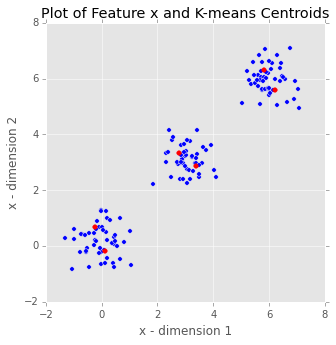

In [10]:
mm = 50
set_clusters = 3
m = mm * set_clusters
N = 2

   
x = assign_points(mm, set_clusters, m, N)

#TRY THIS WITH DIFFEREENT VALUES OF K
K=6

min_iter = 1e99

#run K-means 100 times, each time using a different random starting position for the centroids
for iters in xrange(100):
    (centroids, j) = K_means(K, x, m, N)
    if j < min_iter:
        min_iter = j
        rem_j = j
        rem_c = centroids

print "After 100 trials, each begining at a new random position, K-means found:"
print "The minimum cost = {:5.2f}\n".format(rem_j)
print "There were {:d} centroids whose locations are:".format(K)
for k in xrange(K):
    print "Centroid {:d}".format(k)
    for n in xrange(N):
        print "x{:d} = {:5.3f}".format(n, rem_c[k][n]),
    print "\n"
    
    
#Plot the data and the centroids
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_title("Plot of Feature x and K-means Centroids")
ax.set_xlabel("x - dimension 1")
ax.set_ylabel("x - dimension 2")
ax.scatter(x[:,0], x[:,1])

for k in xrange(K):
    ax.scatter(rem_c[k][0], rem_c[k][1], marker = 'o', color = 'r')


##K-means can also be used to categorize continuous data

##K-means optimization objective
##$J(\vec{c}, \vec{\mu}) = \frac{1}{m}\sum_{i=1}^{m}||\vec{x_{i}}-\vec{\mu_{(c)i}}||^{2}$

##The cost function is sometimes called the Distortion Function of the K-means algorithm

##Random initialisation helps overcome local minima problem
##Choose the number of clusters by hand!!
##With no labels there's no correct answer - can try the "knee of the curve" or "elbow" method
##Often does not provide a definitive "elbow"
##Set K to your downstream purspose - what are you doing with your clusters?

---
##Let's now generate data - increasing the number of clusters and recording the cost function at each k
---

In [12]:
#have 25 points per cluster
mm = 25

#have 5 clusters
set_clusters = 5

#for a total number of points mm * KK
m = mm * set_clusters

#Keep it in 2 dimensions
N = 2

color_list=['yellow', 'green', 'orange', 'black', 'red', 'white', 'cyan', 'magenta']

#get the artificial data
x = assign_points(mm, set_clusters, m, N)

j_list=[]
c_list = []
k_list = []

#try 2 to 14 clusters
for K in xrange(2, 15):
    print K,
    
    k_list.append(K)
    min_iter = 1e99
    
    #do 100 trials for each k
    for iters in xrange(100):
        
        #get the centroids for each K, and the cost
        (centroids, j) = K_means(K, x, m, N)
        
        #record the model with the minimum cost within the 100 trials
        if j < min_iter:
            min_iter = j
            rem_j = j
            rem_c = centroids
    
    j_list.append(rem_j)
    c_list.append(rem_c)

2 3 4 5 6 7 8 9 10 11 12 13 14


---
##Plot the curve
###This example has been contrived to work!!
---

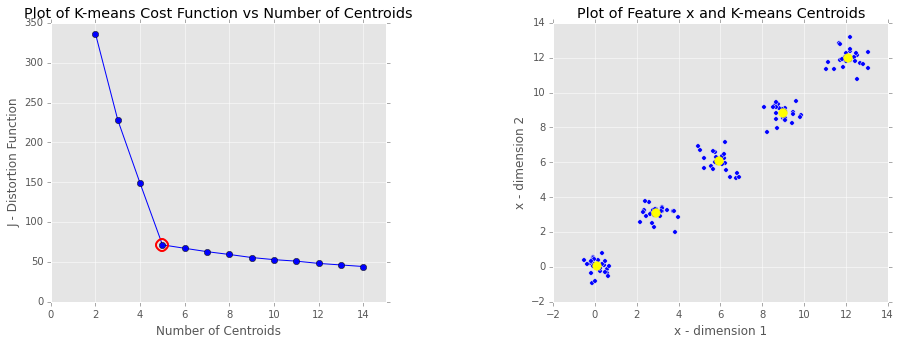

In [14]:
#Plot the cost function against the number of centroids
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(121)
ax.set_title("Plot of K-means Cost Function vs Number of Centroids")
ax.set_xlabel("Number of Centroids")
ax.set_ylabel("J - Distortion Function")
ax.plot(k_list, j_list, marker='o', color='blue')
ax.set_xlim(0, 15)
ax.plot(k_list[3], j_list[3], marker='o', markersize=12, 
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')

#Plot the data and the centroids for each model
ax1 = plt.subplot(122)
ax1.set_title("Plot of Feature x and K-means Centroids")
ax1.set_xlabel("x - dimension 1")
ax1.set_ylabel("x - dimension 2")
ax1.scatter(x[:,0], x[:,1])

best_K_index = 3

ax1.scatter(c_list[best_K_index][:, 0], c_list[best_K_index][:, 1], s=75, marker = 'o', color = 'yellow')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5) 